In [ ]:
import scipy.io as scio
import networkx as nx
import karateclub
import random
import numpy as np
import torch
import pickle
from collections import defaultdict
import sys

def build_item_adj_lists(history_v_lists):
    adj_lists = {}
    for key in history_v_lists.keys():
        adj_lists[key] = []
    for key in history_v_lists.keys():
        for key_temp in history_v_lists.keys():
            if key != key_temp and len(set(history_v_lists[key]) | set(history_v_lists[key_temp])) != 0:
                if len(set(history_v_lists[key]) & set(history_v_lists[key_temp])) / len(set(history_v_lists[key]) | set(history_v_lists[key_temp])) > 0.5:
                    adj_lists[key].append(key_temp)
    return adj_lists
  
path = 'data/epinions'
trust = scio.loadmat(path + '/trustnetwork.mat')
trust = trust['trustnetwork']
rating = scio.loadmat(path + '/rating.mat')
rating = rating['rating']

delete = []
for i in range(len(trust)):
  if trust[i,0] == trust[i, 1]:
    delete.append(i)
trust = np.delete(trust, delete, 0)

dic_user_o2i = {}
i = 0
# build user index
for user in trust.reshape(-1,):
  if user in dic_user_o2i.keys():
    continue
  else:
    dic_user_o2i[user] = i
    i += 1
print('building from trust',len(dic_user_o2i))

delete = []
for i in range(len(rating)):
  if rating[i,0] not in dic_user_o2i.keys():
    delete.append(i)
rating = np.delete(rating, delete, 0)
print('rating_num:',len(rating))

dic_item_o2i = {}
i = 0
for item in rating[:, 1]:
  if item in dic_item_o2i.keys():
    continue
  else:
    dic_item_o2i[item] = i
    i += 1
print('number of items ', len(dic_item_o2i.keys()))

history_u_lists = defaultdict()
history_ur_lists = defaultdict()
history_v_lists = defaultdict()
history_vr_lists = defaultdict()
social_adj_lists = defaultdict()
ratings_list = defaultdict()
data_total = []
print('building social_adj_lists')
for user in range(len(dic_user_o2i)):
  social_adj_lists[user] = []
for line in trust:
  social_adj_lists[dic_user_o2i[line[0]]].append(dic_user_o2i[line[1]])
  social_adj_lists[dic_user_o2i[line[1]]].append(dic_user_o2i[line[0]])
for user in range(len(dic_user_o2i)):
  social_adj_lists[user] = set(social_adj_lists[user])

print('building ratings_list')
i = 0
for rate in set(rating[:, 3]):
  ratings_list[rate] = i
  i += 1
  
print('building other dicts')
for user in range(len(dic_user_o2i)):
  history_u_lists[user] = []
  history_ur_lists[user] = []
for item in range(len(dic_item_o2i)):
  history_v_lists[item] = []
  history_vr_lists[item] = []
  
rating = rating[:, [0, 1, 3]]
np.random.shuffle(rating)
valid = rating[ : int(0.1 * len(rating))]
test = rating[int(0.1 * len(rating)) : int(0.2 * len(rating))]
train = rating[int(0.2 * len(rating)): ]

print('validset')
validset = []
testset = []
for line in valid:
  user = line[0]
  item = line[1]
  rate = ratings_list[line[2]]
  if user in dic_user_o2i.keys():
    validset.append([dic_user_o2i[user], dic_item_o2i[item], rate])  
print('testset')
for line in test:
  user = line[0]
  item = line[1]
  rate = ratings_list[line[2]]
  if user in dic_user_o2i.keys():
    testset.append([dic_user_o2i[user], dic_item_o2i[item], rate]) 
print('trainingset')
for line in train:
  user = line[0]
  item = line[1]
  rate = ratings_list[line[2]]
  if user in dic_user_o2i.keys():
    history_u_lists[dic_user_o2i[user]].append(dic_item_o2i[item])
    history_ur_lists[dic_user_o2i[user]].append(rate)
    history_v_lists[dic_item_o2i[item]].append(dic_user_o2i[user])
    history_vr_lists[dic_item_o2i[item]].append(rate)
    data_total.append([dic_user_o2i[user], dic_item_o2i[item], rate])
item_adj_lists = build_item_adj_lists(history_v_lists)
pickle_data = [history_u_lists, history_ur_lists, history_v_lists, history_vr_lists, data_total, validset, testset, social_adj_lists, item_adj_lists, ratings_list]
with open("data/epinions8.pkl", 'wb') as fo:
    pickle.dump(pickle_data, fo)

building from trust 18069
rating_num: 762938
number of items  261246
building social_adj_lists
building ratings_list
building other dicts
validset
testset
trainingset


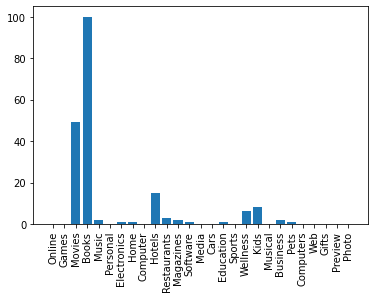

10


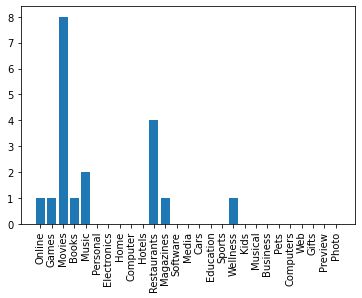

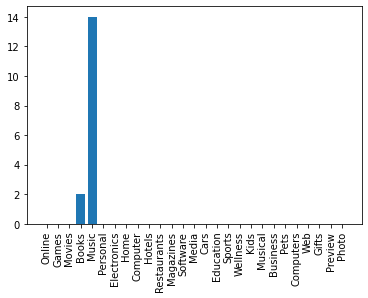

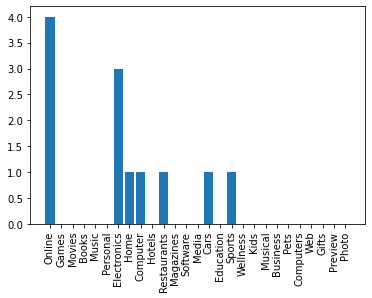

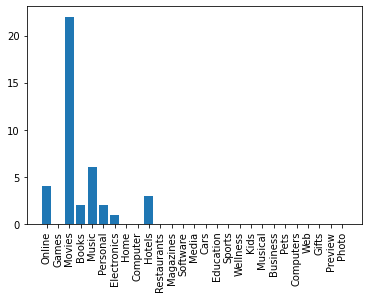

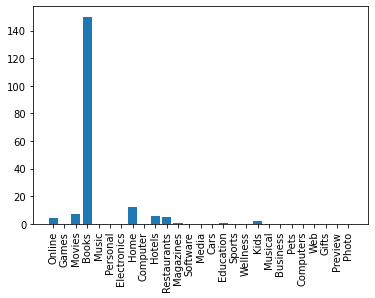

0

In [64]:
import matplotlib.pyplot as plt
with open(path + '/category.txt') as f:
    category_name = []
    lines = f.readlines()
    for line in lines:
        category_name.append(line.strip().split(' ')[1])
    
def category_distribution(user):
    ls = [0 for i in range(len(category_name))]
    for item in history_u_lists[user]:
        ls[dic_category[item]-1] += 1
    plt.bar(category_name,ls)
    plt.xticks(rotation=90)
    plt.show()
    return 0

def show_friends(user):
    category_distribution(user)
    neighbors = list(social_adj_lists[user])
    print(min(10, len(neighbors)))
    for i in range(min(10, len(neighbors))):
        category_distribution(neighbors[i])
    return 0
show_friends(1235)

In [35]:
import networkx as nx

path = 'data/epinions'
trust = scio.loadmat(path + '/trustnetwork.mat')
trust = trust['trustnetwork']
print(trust.shape)
rating = scio.loadmat(path + '/rating.mat')
rating = rating['rating']

delete = []
for i in range(len(trust)):
  if trust[i,0] == trust[i, 1]:
    delete.append(i)
trust = np.delete(trust, delete, 0)

dic_user_o2i = {}
i = 0
# build user index
for user in trust.reshape(-1,):
  if user in dic_user_o2i.keys():
    continue
  else:
    dic_user_o2i[user] = i
    i += 1
print('building from trust',len(dic_user_o2i))

print(trust.shape)
graph = nx.from_edgelist(trust)
graph = graph.to_undirected()
print(nx.is_connected(graph))
giant = sorted(nx.connected_components(graph), key=len, reverse=True)[0]
len(giant)

(355754, 2)
building from trust 18069
(355530, 2)
False


17990

In [8]:
# data summary
import scipy.io as scio
import networkx as nx
import karateclub
import random
import numpy as np
import torch
import pickle
from collections import defaultdict
import sys

path = 'data/ciao'
trust = scio.loadmat(path + '/trustnetwork.mat')
trust = trust['trustnetwork']
rating = scio.loadmat(path + '/rating.mat')
rating = rating['rating']

delete = []
for i in range(len(trust)):
  if trust[i,0] == trust[i, 1]:
    delete.append(i)
trust = np.delete(trust, delete, 0)
print('trust_num:', len(trust))
dic_user_o2i = {}
i = 0
# build user index
for user in trust.reshape(-1,):
  if user in dic_user_o2i.keys():
    continue
  else:
    dic_user_o2i[user] = i
    i += 1
print('building from trust',len(dic_user_o2i))

delete = []
for i in range(len(rating)):
  if rating[i,0] not in dic_user_o2i.keys():
    delete.append(i)
rating = np.delete(rating, delete, 0)
print('rating_num:',len(rating))

dic_item_o2i = {}
i = 0
for item in rating[:, 1]:
  if item in dic_item_o2i.keys():
    continue
  else:
    dic_item_o2i[item] = i
    i += 1
print('number of items ', len(dic_item_o2i.keys()))

trust_num: 111781
building from trust 7317
rating_num: 283320
number of items  104975


In [7]:
355530 / (18069*18069)

0.0010889501951339758